In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import re

### Read csv files as a DataFrame

In [2]:
train_df = pd.read_csv("train.csv")
test_df    = pd.read_csv("test.csv")
train_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [3]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

###  Titanic Feature Engineering

In [198]:
print train_df[['Survived']].mean()

Survived    0.383838
dtype: float64


In [4]:
print train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).agg(['mean', 'count'])

        Survived      
            mean count
Pclass                
1       0.629630   216
2       0.472826   184
3       0.242363   491


In [5]:
print train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).agg(['mean', 'count'])

        Survived      
            mean count
Sex                   
female  0.742038   314
male    0.188908   577


In [6]:
train_df['Family'] = train_df['SibSp'] + train_df['Parch']
print train_df[['Family', 'Survived']].groupby(['Family'], as_index=False).agg(['mean', 'count'])

        Survived      
            mean count
Family                
0       0.303538   537
1       0.552795   161
2       0.578431   102
3       0.724138    29
4       0.200000    15
5       0.136364    22
6       0.333333    12
7       0.000000     6
10      0.000000     7


In [7]:
train_df['IsAlone'] = 0
train_df.loc[train_df['Family'] == 0, 'IsAlone'] = 1
print train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).agg(['mean', 'count'])

         Survived      
             mean count
IsAlone                
0        0.505650   354
1        0.303538   537


In [8]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')
print train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).agg(['mean', 'count'])

          Survived      
              mean count
Embarked                
C         0.553571   168
Q         0.389610    77
S         0.339009   646


In [9]:
train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].median())
train_df['CategoricalFare'] = pd.qcut(train_df['Fare'], 3)
print train_df[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).agg(['mean', 'count'])
train_df['CategoricalFare'] = pd.qcut(train_df['Fare'], 6)
print train_df[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).agg(['mean', 'count'])

                 Survived      
                     mean count
CategoricalFare                
[0, 8.662]       0.198052   308
(8.662, 26]      0.402778   288
(26, 512.329]    0.559322   295
                   Survived      
                       mean count
CategoricalFare                  
[0, 7.775]         0.205128   156
(7.775, 8.662]     0.190789   152
(8.662, 14.454]    0.366906   139
(14.454, 26]       0.436242   149
(26, 52.369]       0.417808   146
(52.369, 512.329]  0.697987   149


In [10]:
train_df['CategoricalAge'] = pd.cut(train_df['Age'], 5)
print train_df[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).agg(['mean', 'count'])

                  Survived      
                      mean count
CategoricalAge                  
(0.34, 16.336]    0.550000   100
(16.336, 32.252]  0.369942   346
(32.252, 48.168]  0.404255   188
(48.168, 64.084]  0.434783    69
(64.084, 80]      0.090909    11


In [11]:
pattern = re.compile(r'.*?,(.*?)\.')
def get_title(x):
    result = pattern.search(x)
    if result:
        return result.group(1).strip()
    else:
        return ''
train_df['Title'] = train_df['Name'].apply(get_title)
print train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).agg(['mean', 'count'])
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')
print train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).agg(['mean', 'count'])

              Survived      
                  mean count
Title                       
Capt          0.000000     1
Col           0.500000     2
Don           0.000000     1
Dr            0.428571     7
Jonkheer      0.000000     1
Lady          1.000000     1
Major         0.500000     2
Master        0.575000    40
Miss          0.697802   182
Mlle          1.000000     2
Mme           1.000000     1
Mr            0.156673   517
Mrs           0.792000   125
Ms            1.000000     1
Rev           0.000000     6
Sir           1.000000     1
the Countess  1.000000     1
              Survived      
                  mean count
Title                       
Master        0.575000    40
Miss          0.702703   185
Mr            0.156673   517
Mrs           0.793651   126
Others        0.318182    22
the Countess  1.000000     1


### Feature preprocessing

In [35]:
pattern = re.compile(r'.*?,(.*?)\.')
def get_title(x):
    result = pattern.search(x)
    if result:
        return result.group(1).strip()
    else:
        return ''

In [36]:
def preprocess_age_title(data):
    data['Title'] = data['Name'].map(get_title)
    #'Master' 
    master_age_mean = data['Age'][(data['Title']=='Master')&(data['Age']>0)].mean()
    data.loc[data[(data['Title']=='Master')&(data['Age'].isnull())].index, 'Age'] = master_age_mean
    #'Mr' 
    mr_age_mean = data['Age'][(data['Title']=='Mr')&(data['Age']>0)].mean()
    data.loc[data[(data['Title']=='Mr')&(data['Age'].isnull())].index, 'Age'] = mr_age_mean
    #'Miss' or 'Ms'
    miss_age_mean = data['Age'][(data['Title']=='Miss')&(data['Age']>0)].mean()
    data.loc[data[(data['Title']=='Miss')&(data['Age'].isnull())].index, 'Age'] = miss_age_mean
    #'Mrs' 
    mrs_age_mean = data['Age'][(data['Title']=='Mrs')&(data['Age']>0)].mean()
    data.loc[data[(data['Title']=='Mrs')&(data['Age'].isnull())].index, 'Age'] = mrs_age_mean
    #'Dr' 
    dr_age_mean = data['Age'][(data['Title']=='Dr')&(data['Age']>0)].mean()
    data.loc[data[(data['Title']=='Dr')&(data['Age'].isnull())].index, 'Age'] = dr_age_mean
    
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')
    title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Others': 5}
    data['Title'] = data['Title'].map(title_mapping)
    data['Title'] = data['Title'].fillna(0)
    data['Title'] = data['Title'].astype(int)
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Age'] = data['Age'].astype(int)
    return (data,['Title','Age'])

In [37]:
def preprocess_family(data):
    data['Family'] = data['SibSp'] + data['Parch']
    data['IsAlone'] = 0
    data.loc[train_df['Family'] == 0, 'IsAlone'] = 1
    return (data,['Family','IsAlone'])

In [38]:
def preprocess_embarked_sex(data):
    max_value = data['Embarked'].value_counts().index[0]
    data['Embarked'].fillna(max_value, inplace=True)
    data['Embarked'] = data.Embarked.map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    data['Sex'] = data['Sex'].map({'male': 1, 'female': 0}).astype(int)
    return (data,['Embarked','Sex'])

In [39]:
def preprocess_fare(data):
    data["Fare"].fillna(data["Fare"].median(), inplace=True)
    return (data,['Fare'])

In [40]:
def preprocess_child(data):
    data['Child'] = data[['Age']].apply(lambda x: x<16,axis=1).astype(int)
    return (data,['Child'])

In [41]:
def onehot_encoding(data,column):
    dummies  = pd.get_dummies(data[column],prefix=column).astype(int)
    new_columns = dummies.columns.values
    data = data.join(dummies)
    return (data,new_columns)

In [138]:
#Init 
train_df = pd.read_csv("train.csv")
test_df    = pd.read_csv("test.csv")
train_cols = []
train_cols_onehot=[]
#Pclass
train_cols.extend(['Pclass'])
train_df,cols = onehot_encoding(train_df,'Pclass')
test_df,_ = onehot_encoding(test_df,'Pclass')
train_cols_onehot.extend(cols)
#data SibSp and Parch
train_cols.extend(['SibSp','Parch'])
train_cols_onehot.extend(['SibSp','Parch'])
#Title and Age
train_df,cols = preprocess_age_title(train_df)
test_df,_ = preprocess_age_title(test_df)
train_cols.extend(cols)
train_cols_onehot.extend(['Age'])
train_df,cols = onehot_encoding(train_df,'Title')
test_df,_ = onehot_encoding(test_df,'Title')
train_cols_onehot.extend(cols)
train_cols_onehot.remove('Title_0')
#Family
train_df,cols = preprocess_family(train_df)
test_df,_ = preprocess_family(test_df)
train_cols.extend(cols)
train_cols_onehot.extend(cols)
#Embarked and Sex
train_df,cols = preprocess_embarked_sex(train_df)
test_df,_ = preprocess_embarked_sex(test_df)
train_cols.extend(cols)
train_cols_onehot.extend(['Sex'])
train_df,cols = onehot_encoding(train_df,'Embarked')
test_df,_ = onehot_encoding(test_df,'Embarked')
train_cols_onehot.extend(cols)
#Fare
train_df,cols = preprocess_fare(train_df)
test_df,cols = preprocess_fare(test_df)
train_cols.extend(cols)
train_cols_onehot.extend(cols)
#Child
train_df,cols =preprocess_child(train_df)
test_df,cols =preprocess_child(test_df)
train_cols.extend(cols)
train_cols_onehot.extend(cols)

In [139]:
print train_cols
print train_cols_onehot


['Pclass', 'SibSp', 'Parch', 'Title', 'Age', 'Family', 'IsAlone', 'Embarked', 'Sex', 'Fare', 'Child']
['Pclass_1', 'Pclass_2', 'Pclass_3', 'SibSp', 'Parch', 'Age', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5', 'Family', 'IsAlone', 'Sex', 'Embarked_0', 'Embarked_1', 'Embarked_2', 'Fare', 'Child']


In [219]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.partial_fit(train_df[['Fare','Age']])
ss.partial_fit(test_df[['Fare','Age']])
train_df[['Fare','Age']] = ss.transform(train_df[['Fare','Age']])
test_df[['Fare','Age']] = ss.transform(test_df[['Fare','Age']])

### Single Classifier

In [221]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [222]:
from sklearn.model_selection import GridSearchCV, cross_val_score
parameters = {'C' : np.logspace(-2, 1, 10)}
est = LinearSVC()
clf = GridSearchCV(estimator=est, param_grid=parameters,cv=5,n_jobs=-1,verbose=1)
clf.fit(train_df[train_cols_onehot], train_df['Survived'])        
print clf.best_score_     
print clf.best_estimator_.C
best_result = {'SVC':clf.best_score_}
svc_C =  clf.best_estimator_.C

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s


0.826038159371
0.464158883361


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.9s finished


In [227]:
parameters = {'max_depth':[4,5,6,7,8],'max_features':[0.5,0.6,0.7,0.8,0.9,1],'class_weight':[{1:0.383838,0:0.616162}]}
est = DecisionTreeClassifier()
clf = GridSearchCV(estimator=est, param_grid=parameters,cv=5,n_jobs=-1,verbose=1)
clf.fit(train_df[train_cols], train_df['Survived'])        
print clf.best_score_             
print clf.best_estimator_.max_depth   
print clf.best_estimator_.max_features   
best_result = {'DecisionTreeClassifier':clf.best_score_}
dtc_max_depth =  clf.best_estimator_.max_depth 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s


0.835016835017
7
0.8


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.8s finished


In [211]:
parameters = {'max_depth':[3,4,5,6],'n_estimators':[75,100,150,200,300],'learning_rate':[0.01,0.05,0.08,0.1,0.2]}
est = GradientBoostingClassifier()
clf = GridSearchCV(estimator=est, param_grid=parameters,cv=5,n_jobs=-1,verbose=1)
clf.fit(train_df[train_cols], train_df['Survived'])        
print clf.best_score_ 
print clf.best_estimator_.max_depth
print clf.best_estimator_.n_estimators
print clf.best_estimator_.learning_rate
best_result = {'GradientBoostingClassifier':clf.best_score_}
gbc_max_depth =  clf.best_estimator_.max_depth 
gbc_n_estimators = clf.best_estimator_.n_estimators
gbc_learning_rate = clf.best_estimator_.learning_rate

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   29.6s finished


0.843995510662
3
150
0.1


In [243]:
parameters = {'max_depth':[5,6,7,8,9],'n_estimators':[50,100,150,200,300],'max_features':[0.5,0.6,0.8,0.9],'class_weight':[{1:0.383838,0:0.616162}]}
est = RandomForestClassifier()
clf = GridSearchCV(estimator=est, param_grid=parameters,cv=5,n_jobs=-1,verbose=1)
clf.fit(train_df[train_cols], train_df['Survived'])        
print clf.best_score_ 
print clf.best_estimator_.max_depth
print clf.best_estimator_.n_estimators
print clf.best_estimator_.max_features
best_result = {'RandomForestClassifier':clf.best_score_}
rfc_max_depth =  clf.best_estimator_.max_depth 
rfc_n_estimators=clf.best_estimator_.n_estimators

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.5min finished


0.841750841751
8
200
1


In [182]:
parameters = {'C' : np.logspace(-1, 1, 10)}
est = LogisticRegression()
clf = GridSearchCV(estimator=est, param_grid=parameters,cv=5,n_jobs=-1,verbose=1)
clf.fit(train_df[train_cols_onehot], train_df['Survived'])        
print clf.best_score_     
print clf.best_estimator_.C
best_result = {'LogisticRegression':clf.best_score_}
lr_C =  clf.best_estimator_.C

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.826038159371
5.99484250319


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.6s finished


In [223]:
clf = GaussianNB()
clf.fit(train_df[train_cols_onehot], train_df['Survived'])    
re = cross_val_score(clf,train_df[train_cols_onehot], train_df['Survived'],cv=5).sum()/5
print re
best_result = {'GaussianNB':re}

0.801416702751


In [184]:
parameters = {'n_neighbors' :[2,3,4,5]}
est = KNeighborsClassifier()
clf = GridSearchCV(estimator=est, param_grid=parameters,n_jobs=-1,cv=5,verbose=1)
clf.fit(train_df[train_cols_onehot], train_df['Survived'])        
print clf.best_score_     
print clf.best_estimator_.n_neighbors
best_result = {'KNeighborsClassifier':clf.best_score_}
KNC_C =  clf.best_estimator_.n_neighbors

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.734006734007
3


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.0s finished


{'KNN': array([ 0.79888268,  0.75977654,  0.8258427 ,  0.79213483,  0.80225989]), 'LinearSVC': array([ 0.83798883,  0.82122905,  0.79775281,  0.78651685,  0.8700565 ]), 'GBT': array([ 0.84916201,  0.83240223,  0.87078652,  0.83707865,  0.83050847]), 'GNB': array([ 0.77653631,  0.81005587,  0.80898876,  0.76404494,  0.84745763]), 'RF': array([ 0.82122905,  0.81564246,  0.87640449,  0.80898876,  0.83050847]), 'LR': array([ 0.82681564,  0.81564246,  0.80337079,  0.80898876,  0.87570621]), 'DT': array([ 0.80446927,  0.82122905,  0.84269663,  0.78651685,  0.85310734])}


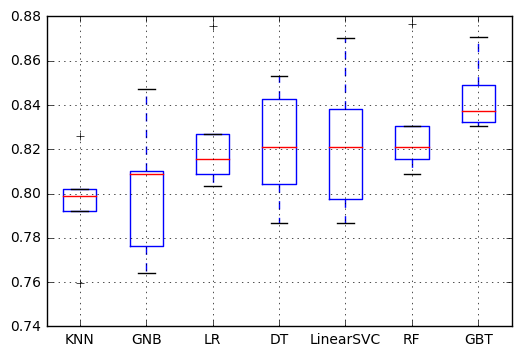

In [282]:
import matplotlib.pyplot as plt
clf_test = [('LinearSVC',LinearSVC(C=0.0464158883361)),
        ('GNB',GaussianNB()),
        ('LR',LogisticRegression(C=5.99484250319)),
        ('DT',DecisionTreeClassifier(max_depth=8,max_features=0.9,class_weight={1:0.383838,0:0.616162})),
        ('GBT',GradientBoostingClassifier(max_depth=3,n_estimators=150,learning_rate=0.1)),
        ('RF',RandomForestClassifier(max_depth=8,n_estimators=300,max_features=0.8,class_weight={1:0.383838,0:0.616162})),
        ('KNN',KNeighborsClassifier(n_neighbors=3))
]
result = {}
for i,(name,clf) in enumerate(clf_test):
    if i<3:
        tmp = cross_val_score(clf,train_df[train_cols_onehot], train_df['Survived'],cv=5)
    else:
        tmp = cross_val_score(clf,train_df[train_cols], train_df['Survived'],cv=5)
    result[name] = tmp
# for i,(name,clf) in enumerate(clf_test):
#     if i<3:
#         tmp = cross_val_score(clf,train_df[train_cols_onehot], train_df['Survived'],cv=5)
#     else:
#         tmp = cross_val_score(clf,train_df[train_cols], train_df['Survived'],cv=5)
#     result[name] = np.append(result[name],tmp)
print result
df_results = pd.DataFrame(result)
df_results[df_results.median().sort_values(ascending=True).index].boxplot();

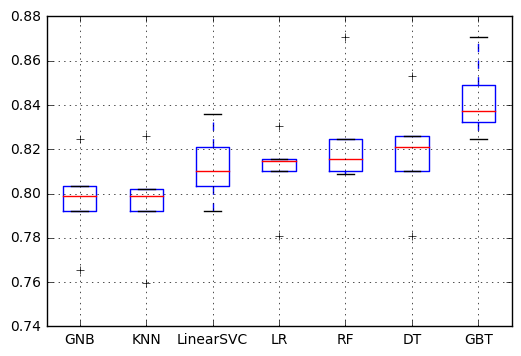

In [275]:
clf_test = [('LinearSVC',LinearSVC(C=0.0464158883361)),
        ('GNB',GaussianNB()),
        ('LR',LogisticRegression(C=5.99484250319)),
        ('DT',DecisionTreeClassifier(max_depth=8,max_features=0.9,class_weight={1:0.383838,0:0.616162})),
        ('GBT',GradientBoostingClassifier(max_depth=3,n_estimators=150,learning_rate=0.1)),
        ('RF',RandomForestClassifier(max_depth=8,n_estimators=200,max_features=0.8,class_weight={1:0.383838,0:0.616162})),
        ('KNN',KNeighborsClassifier(n_neighbors=3))
]
result = {}
for i,(name,clf) in enumerate(clf_test):
    if i<3:
        tmp = cross_val_score(clf,train_df[train_cols], train_df['Survived'],cv=5)
    else:
        tmp = cross_val_score(clf,train_df[train_cols], train_df['Survived'],cv=5)
    result[name] = tmp
# for i,(name,clf) in enumerate(clf_test):
#     if i<3:
#         tmp = cross_val_score(clf,train_df[train_cols_onehot], train_df['Survived'],cv=5)
#     else:
#         tmp = cross_val_score(clf,train_df[train_cols], train_df['Survived'],cv=5)
#     result[name] = np.append(result[name],tmp)
print result
df_results = pd.DataFrame(result)
df_results[df_results.median().sort_values(ascending=True).index].boxplot();

{'KNN': array([ 0.79888268,  0.75418994,  0.82022472,  0.79213483,  0.81355932]), 'LinearSVC': array([ 0.84357542,  0.82122905,  0.79775281,  0.79213483,  0.87570621]), 'GBT': array([ 0.83798883,  0.82122905,  0.86516854,  0.82022472,  0.83050847]), 'GNB': array([ 0.77653631,  0.81005587,  0.80898876,  0.76404494,  0.84745763]), 'RF': array([ 0.81564246,  0.78212291,  0.8258427 ,  0.78651685,  0.83050847]), 'LR': array([ 0.83240223,  0.81564246,  0.80337079,  0.79775281,  0.86440678]), 'DT': array([ 0.77094972,  0.75418994,  0.80898876,  0.73595506,  0.73446328])}


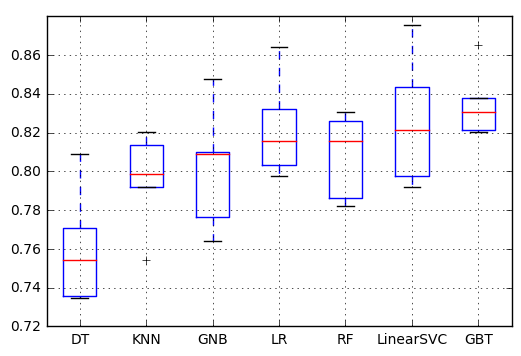

In [290]:
clf_test = [('LinearSVC',LinearSVC()),
        ('GNB',GaussianNB()),
        ('LR',LogisticRegression()),
        ('DT',DecisionTreeClassifier()),
        ('GBT',GradientBoostingClassifier()),
        ('RF',RandomForestClassifier()),
        ('KNN',KNeighborsClassifier())
]
result = {}
origin_cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
for i,(name,clf) in enumerate(clf_test):
    if i<3:
        tmp = cross_val_score(clf,train_df[train_cols_onehot], train_df['Survived'],cv=5)
    else:
        tmp = cross_val_score(clf,train_df[train_cols], train_df['Survived'],cv=5)
    result[name] = tmp
# for i,(name,clf) in enumerate(clf_test):
#     if i<3:
#         tmp = cross_val_score(clf,train_df[train_cols_onehot], train_df['Survived'],cv=5)
#     else:
#         tmp = cross_val_score(clf,train_df[train_cols], train_df['Survived'],cv=5)
#     result[name] = np.append(result[name],tmp)
print result
df_results = pd.DataFrame(result)
df_results[df_results.median().sort_values(ascending=True).index].boxplot();

{'KNN': array([ 0.78212291,  0.75977654,  0.81460674,  0.80898876,  0.79096045]), 'LinearSVC': array([ 0.78212291,  0.78212291,  0.78089888,  0.76966292,  0.82485876]), 'GBT': array([ 0.81564246,  0.81005587,  0.83146067,  0.82022472,  0.85310734]), 'GNB': array([ 0.76536313,  0.79329609,  0.79775281,  0.78651685,  0.79661017]), 'RF': array([ 0.75977654,  0.80446927,  0.83146067,  0.78651685,  0.82485876]), 'LR': array([ 0.79329609,  0.80446927,  0.79775281,  0.76966292,  0.83050847]), 'DT': array([ 0.73743017,  0.75977654,  0.80337079,  0.73595506,  0.77966102])}


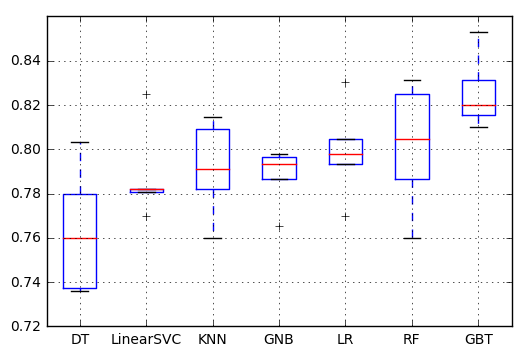

In [291]:
clf_test = [('LinearSVC',LinearSVC()),
        ('GNB',GaussianNB()),
        ('LR',LogisticRegression()),
        ('DT',DecisionTreeClassifier()),
        ('GBT',GradientBoostingClassifier()),
        ('RF',RandomForestClassifier()),
        ('KNN',KNeighborsClassifier())
]
result = {}
origin_cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
for i,(name,clf) in enumerate(clf_test):
    if i<3:
        tmp = cross_val_score(clf,train_df[origin_cols], train_df['Survived'],cv=5)
    else:
        tmp = cross_val_score(clf,train_df[origin_cols], train_df['Survived'],cv=5)
    result[name] = tmp
# for i,(name,clf) in enumerate(clf_test):
#     if i<3:
#         tmp = cross_val_score(clf,train_df[train_cols_onehot], train_df['Survived'],cv=5)
#     else:
#         tmp = cross_val_score(clf,train_df[train_cols], train_df['Survived'],cv=5)
#     result[name] = np.append(result[name],tmp)
print result
df_results = pd.DataFrame(result)
df_results[df_results.median().sort_values(ascending=True).index].boxplot();

### Blending

In [224]:
from sklearn.model_selection import StratifiedKFold
skf= StratifiedKFold(n_splits= 5)
kf_index = list(skf.split(train_df[train_cols],train_df['Survived']))
clfs = [LinearSVC(C=0.0464158883361),
        GaussianNB(),
        LogisticRegression(C=5.99484250319),
        DecisionTreeClassifier(max_depth=8,max_features=0.9,class_weight={1:0.383838,0:0.616162}),
        GradientBoostingClassifier(max_depth=3,n_estimators=150,learning_rate=0.1),
        RandomForestClassifier(max_depth=8,n_estimators=300,max_features=0.8,class_weight={1:0.383838,0:0.616162})
]
dataset_blend_train = np.zeros((train_df.shape[0], len(clfs)))
dataset_blend_test = np.zeros((test_df.shape[0], len(clfs)))
for j, clf in enumerate(clfs):
        print j, clf
        dataset_blend_test_j = np.zeros((test_df.shape[0], len(kf_index)))
        for i, (train, test) in enumerate(kf_index):
            print "Fold", i
            if i<3:
                X_train = train_df[train_cols_onehot].iloc[train]
                y_train = train_df['Survived'].iloc[train]
                X_test = train_df[train_cols_onehot].iloc[test]
                y_test = train_df['Survived'].iloc[test]
                testv = test_df[train_cols_onehot]
            else:
                X_train = train_df[train_cols].iloc[train]
                y_train = train_df['Survived'].iloc[train]
                X_test = train_df[train_cols].iloc[test]
                y_test = train_df['Survived'].iloc[test]
                testv = test_df[train_cols]
            clf.fit(X_train, y_train)
            y_submission = clf.predict(X_test)
            dataset_blend_train[test, j] = y_submission
            dataset_blend_test_j[:, i] = clf.predict(testv)
        dataset_blend_test[:, j] = dataset_blend_test_j.mean(1)


0 LinearSVC(C=0.0464158883361, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
1 GaussianNB(priors=None)
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
2 LogisticRegression(C=5.99484250319, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
3 DecisionTreeClassifier(class_weight={0: 0.616162, 1: 0.383838},
            criterion='gini', max_depth=8, max_features=0.9,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Fold 0
Fold 1
Fold 

In [225]:
clf = LogisticRegression()
clf.fit(dataset_blend_train, train_df['Survived'])
y_prob = clf.predict_proba(dataset_blend_test)
y_submission = clf.predict(dataset_blend_test)

In [297]:
from sklearn.base import BaseEstimator, ClassifierMixin
class IntegrateClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self,clfs,col1,col2):
        self.clfs = clfs
        self.col1 = col1
        self.col2 = col2
    def fit(self, X, y): 
        databladetrain= np.zeros((X.shape[0], len(clfs)))
        for i,clf in enumerate(self.clfs):
            if i<3:
                train = X[self.col2]
            else:
                train = X[self.col1]
            clf.fit(train,y)
            databladetrain[:,i] = clf.predict(train)
        self.fin = LogisticRegression()
        self.fin.fit(databladetrain,y)
        return self

    def predict(self, X):
        databladetest= np.zeros((X.shape[0], len(clfs)))
        for i,clf in enumerate(self.clfs):
            if i<3:
                test = X[self.col2]
            else:
                test = X[self.col1]
            databladetest[:,i] = clf.predict(test)
        
        return self.fin.predict(databladetest)

{'KNN': array([ 0.73184358,  0.75977654,  0.86516854,  0.79775281,  0.80225989]), 'LinearSVC': array([ 0.83798883,  0.82122905,  0.79775281,  0.78651685,  0.8700565 ]), 'GBT': array([ 0.84916201,  0.83240223,  0.87078652,  0.83707865,  0.83050847]), 'GNB': array([ 0.77653631,  0.81005587,  0.80898876,  0.76404494,  0.84745763]), 'RF': array([ 0.83240223,  0.81564246,  0.87078652,  0.80337079,  0.84180791]), 'LR': array([ 0.82681564,  0.81564246,  0.80337079,  0.80898876,  0.87570621]), 'ours': array([ 0.83798883,  0.82122905,  0.88202247,  0.83146067,  0.84745763]), 'DT': array([ 0.75977654,  0.81005587,  0.85393258,  0.76404494,  0.84180791])}


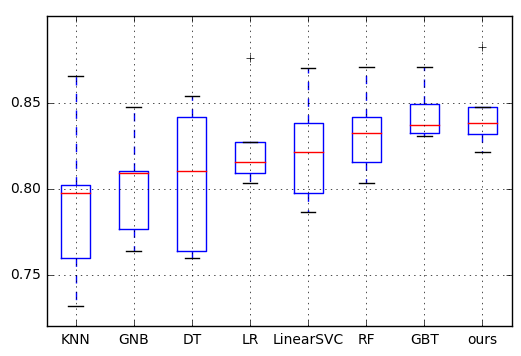

In [300]:
clf_int = [LinearSVC(C=0.0464158883361),
        GaussianNB(),
        LogisticRegression(C=5.99484250319),
        DecisionTreeClassifier(max_depth=8,max_features=0.9,class_weight={1:0.383838,0:0.616162}),
        GradientBoostingClassifier(max_depth=3,n_estimators=150,learning_rate=0.1),
        RandomForestClassifier(max_depth=8,n_estimators=300,max_features=0.8,class_weight={1:0.383838,0:0.616162})
]
clf_test = [('LinearSVC',LinearSVC(C=0.0464158883361)),
        ('GNB',GaussianNB()),
        ('LR',LogisticRegression(C=5.99484250319)),
        ('DT',DecisionTreeClassifier(max_depth=8,max_features=0.9,class_weight={1:0.383838,0:0.616162})),
        ('GBT',GradientBoostingClassifier(max_depth=3,n_estimators=150,learning_rate=0.1)),
        ('RF',RandomForestClassifier(max_depth=8,n_estimators=300,max_features=0.8,class_weight={1:0.383838,0:0.616162})),
        ('KNN',KNeighborsClassifier(n_neighbors=3)),
        ('ours',IntegrateClassifier(clf_int,train_cols,train_cols_onehot))
]
result = {}
all_cols = list(set(train_cols+train_cols_onehot))
for i,(name,clf) in enumerate(clf_test):
    if i<3:
        tmp = cross_val_score(clf,train_df[train_cols_onehot], train_df['Survived'],cv=5)
    elif i<6:
        tmp = cross_val_score(clf,train_df[train_cols], train_df['Survived'],cv=5)
    else:
        tmp = cross_val_score(clf,train_df[all_cols], train_df['Survived'],cv=5)
    result[name] = tmp
# for i,(name,clf) in enumerate(clf_test):
#     if i<3:
#         tmp = cross_val_score(clf,train_df[train_cols_onehot], train_df['Survived'],cv=5)
#     else:
#         tmp = cross_val_score(clf,train_df[train_cols], train_df['Survived'],cv=5)
#     result[name] = np.append(result[name],tmp)
print result
df_results = pd.DataFrame(result)
df_results[df_results.median().sort_values(ascending=True).index].boxplot();

In [226]:
combination = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_submission
    })
combination.to_csv("titanic_predict_combine.csv", index=False)